# Denver

In [1]:
# Load pandas
import pandas as pd
import matplotlib.pyplot

# Read CSV file into DataFrame df
df = pd.read_csv('crime.csv', index_col=0)

In [2]:
df

,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
incident_id,,,,,,,,,,,,,,,,,,
20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022211158,2022211158250100,2501,0,forgery-checks,white-collar-crime,4/27/2022 1:00:00 PM,NaN,4/28/2022 1:34:00 PM,1617 E COLFAX AVE ...,3149527.0,1694928.0,-104.968291,39.740180,6.0,622.0,city-park-west,1,0
2022211261,2022211261260401,2604,1,fraud-criminal-impersonation,white-collar-crime,6/16/2021 12:00:00 AM,2/3/2022 11:59:00 PM,4/28/2022 3:10:00 PM,2979 S PONTIAC ST ...,3167278.0,1666422.0,-104.905835,39.661623,3.0,323.0,hampden,1,0
2022211717,2022211717260500,2605,0,theft-unauth-use-of-ftd,white-collar-crime,4/23/2022 6:30:00 PM,NaN,4/28/2022 3:56:00 PM,2727 W EVANS AVE ...,3134706.0,1672808.0,-105.021407,39.679682,4.0,422.0,college-view-south-platte,1,0


"incident_id":"20226000193":int
"offense_id":"20226000193299900":int
"OFFENSE_CODE":"2999":int
"OFFENSE_CODE_EXTENSION":"0":int
"OFFENSE_TYPE_ID":"criminal-mischief-other":"string"
"OFFENSE_CATEGORY_ID":"public-disorder":"string"
"FIRST_OCCURRENCE_DATE":"1/4/2022 11:30:00 AM":"string datestamp"
"LAST_OCCURRENCE_DATE":"1/4/2022 12:00:00 PM":"string datestamp"
"REPORTED_DATE":"1/4/2022 8:36:00 PM"                                                                                     "
"INCIDENT_ADDRESS":"128 S CANOSA CT"
"GEO_X":"3135366.0000000"
"GEO_Y":"1685410.0000000"
"GEO_LON":"-105.0188253"
"GEO_LAT":"39.7142682"
"DISTRICT_ID":"4"
"PRECINCT_ID":"411"
"NEIGHBORHOOD_ID":"valverde"
"IS_CRIME":"1"
"IS_TRAFFIC""0"


## Group by offenses types

<AxesSubplot:xlabel='OFFENSE_TYPE_ID'>

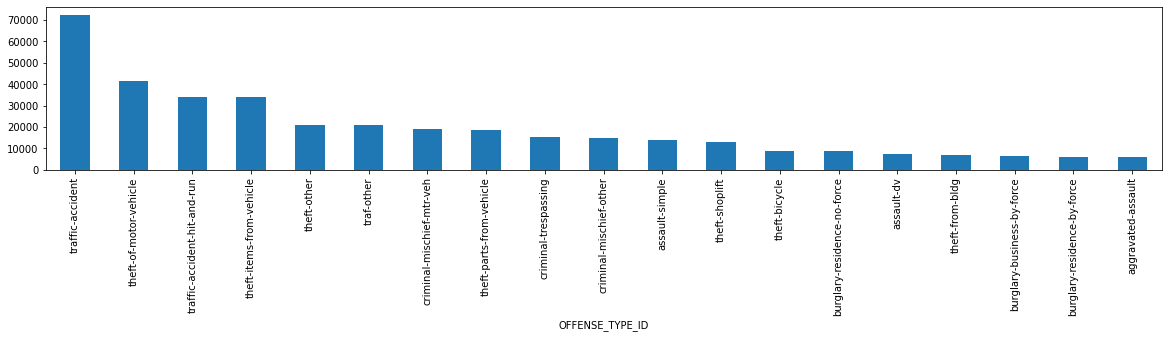

In [3]:
#df_sum_type=dataFrame = pd.DataFrame(df.head(), columns=["OFFENSE_TYPE_ID"])
#df_sum_type.plot(x="OFFENSE_TYPE_ID", kind="bar", figsize=(10, 9))

sums= df.groupby("OFFENSE_TYPE_ID")["OFFENSE_TYPE_ID"].count()
sums= sums.sort_values(ascending=False)[:19]
sums.plot(x="Offense type", kind="bar", figsize=(20,3))


## Group by years

<AxesSubplot:xlabel='YEAR'>

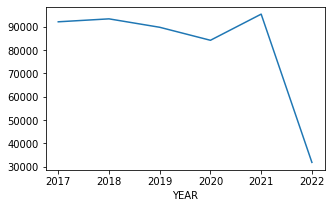

In [4]:
# adding years to dataframe 
df["YEAR"]= pd.to_datetime(df["REPORTED_DATE"], format="%m/%d/%Y %I:%M:%S %p").dt.year

sums_years= df.groupby(["YEAR"])["YEAR"].count()
sums_years= sums_years.sort_index()
sums_years.plot(x="Year", figsize=(5,3))


## Group by years and  offense

Top 20 type of offenses types over the years (not year by year), and their evolution

In [36]:
# sums_years= df[["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID","YEAR"]).count()
# sums_years= sums_years.sort_values(by="OFFENSE_TYPE_ID", ascending=False)
# sums.plot(x="Offense type", kind="bar", figsize=(20,3))


top20_offenses = df.groupby(["OFFENSE_TYPE_ID"])["OFFENSE_TYPE_ID"].count()
top20_offenses = top20_offenses.sort_values(ascending=False)[:19]
#top20_offenses

df_offenses20 = df.loc[df['OFFENSE_TYPE_ID'].isin(top20_offenses.keys())]
df_offenses20 = df_offenses20[["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["YEAR","OFFENSE_TYPE_ID"]).count()
df_offenses20 = df_offenses20.sort_values(by="OFFENSE_TYPE_ID", ascending=False)
#df_offenses20.plot(kind="bar", figsize=(20,3))

years = set([year[0][0] for year in df_offenses20.iterrows()])
years

#data = df["REPORTED_DATE"].iloc[0]
#pd.to_datetime(data, format="%d/%m/%Y %I:%M:%S %p") #1/4/2022 8:36:00 PM




[2022,
 2021,
 2020,
 2019,
 2018,
 2017,
 2017,
 2021,
 2020,
 2019,
 2018,
 2022,
 2021,
 2020,
 2022,
 2018,
 2019,
 2017,
 2021,
 2019,
 2022,
 2020,
 2018,
 2017,
 2017,
 2022,
 2021,
 2019,
 2020,
 2018,
 2018,
 2017,
 2020,
 2022,
 2021,
 2019,
 2020,
 2019,
 2021,
 2022,
 2017,
 2018,
 2021,
 2022,
 2020,
 2018,
 2019,
 2017,
 2022,
 2021,
 2018,
 2019,
 2017,
 2020,
 2021,
 2018,
 2020,
 2017,
 2022,
 2019,
 2017,
 2021,
 2019,
 2018,
 2020,
 2022,
 2018,
 2017,
 2020,
 2022,
 2019,
 2021,
 2018,
 2017,
 2021,
 2020,
 2022,
 2019,
 2018,
 2021,
 2022,
 2020,
 2019,
 2017,
 2021,
 2019,
 2020,
 2018,
 2017,
 2022,
 2022,
 2019,
 2018,
 2017,
 2020,
 2021,
 2020,
 2019,
 2022,
 2017,
 2018,
 2021,
 2022,
 2020,
 2017,
 2019,
 2021,
 2018,
 2017,
 2022,
 2021,
 2019,
 2018,
 2020]

# Offenses by district

## Offenses by district by year

## Offenses by district by type

# Offenses by time of the day

## Offenses by time of the day and type